In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

iris = pd.read_csv('iris.csv')

shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())
print(iris.species.unique())

    sepal_length  sepal_width  petal_length  petal_width          species
24           6.4          2.9           4.3          1.3  Iris-versicolor
4            6.5          2.8           4.6          1.5  Iris-versicolor
90           6.7          3.1           5.6          2.4   Iris-virginica
66           6.5          3.0           5.5          1.8   Iris-virginica
15           6.7          3.1           4.4          1.4  Iris-versicolor
['Iris-versicolor' 'Iris-virginica']


We are predicting the species of iris flowers from data with the following features:

1. sepal_length - Continuous variable measured in centimeters.
2. sepal_width - Continuous variable measured in centimeters.
3. petal_length - Continuous variable measured in centimeters.
4. petal_width - Continuous variable measured in centimeters.
5. species - Categorical. 
2 species of iris flowers, Iris-virginica or Iris-versicolor.

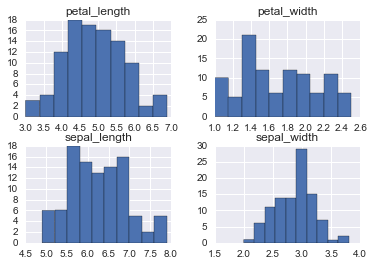

In [2]:
iris.hist()
plt.show()

Neither a linear model nor logistic model is capable of building such a function, so we must explore other options like neural networks. Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output.

Essentially, the Logistic Regression function acts as a Neuron in this case.

In [3]:
iris['ones'] = np.ones(iris.shape[0]) #This is the Bias in a Neuron model or Intercept in a Linear Model
X = iris[['ones','sepal_length','sepal_width','petal_length','petal_width']].values
y = (iris.species == 'Iris-versicolo').values.astype(int)

x0 = X[0]

theta_init = np.random.normal(0,0.01,size=(5,1))

def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T,x)))

a1 = sigmoid_activation(x0,theta_init)
print(a1)

[ 0.48699719]


We can train a single neuron as a two layer network using gradient descent. As we learned in the previous mission, we need to minimize a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output.

Since our targets, yiyi, are binary, either yiyi or (1−yi)(1−yi) will equal zero. One of the terms in the summation will disappear because of this result and. the activation function is then used to compute the error. For example, if we observe a true target, yi=1yi=1, then we want hΘ(xi)hΘ(xi) to also be close to 1. So as hΘ(xi)hΘ(xi) approaches 1, the log(hΘ(xi))log(hΘ(xi)) becomes very close to 0. Since the log of a value between 0 and 1 is negative, we must take the negative of the entire summation to compute the cost. The parameters are randomly initialized using a normal random variable with a small variance, less than 0.1.

In [4]:
x0 = X[0]
y0 = y[0]

theta_init = np.random.normal(0,0.1,size=(5,1))

def singlecost(X, y, theta):
    h = sigmoid_activation(X.T, theta)
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)
print(first_cost)

1.22944268227


In the previous mission we learned that we need to compute the partial deriviatives of the cost function to get the gradients. Calculating derivatives are more complicated in neural networks than in linear regression. Here we must compute the overall error and then distribute that error to each parameter.

The first part is computing the error between the target variable and prediction. The second part then computes the sensitivity relative to each parameter. In the end, the gradients are computed as: δ=(yi−hΘ(xi))∗hΘ(xi)∗(1−hΘ(xi))∗xiδ=(yi−hΘ(xi))∗hΘ(xi)∗(1−hΘ(xi))∗xi.

Now we will step through the math. (yi−hΘ(xi))(yi−hΘ(xi)) is a scalar and the error between our target and prediction. hΘ(xi)∗(1−hΘ(xi))hΘ(xi)∗(1−hΘ(xi)) is also a scalar and the sensitivity of the activation function. xixi is the features for our observation i. δδ is then a vector of length 5, 4 features plus a bias unit, corresponding to the gradients.

To implement this, we compute δδ for each observation, then average to get the average gradient. The average gradient is then used to update the corresponding parameters.

In [5]:
theta_init = np.random.normal(0,0.1,size=(5,1))

grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]
for j, obs in enumerate(X):
    h = sigmoid_activation(obs, theta_init)
    delta = (y[j]-h) * h * (1-h) * obs
    grads += delta[:,np.newaxis]/X.shape[0]
    
print(grads)

[[-0.14515005]
 [-0.90760216]
 [-0.4164679 ]
 [-0.71072742]
 [-0.24277365]]


Gradient descent minimizes the cost function by adjusting the parameters accordingly. Adjust the parameters by substracting the product of the gradients and the learning rate from the previous parameters. Repeat until the cost function coverges or a maximum number of iterations is reached.

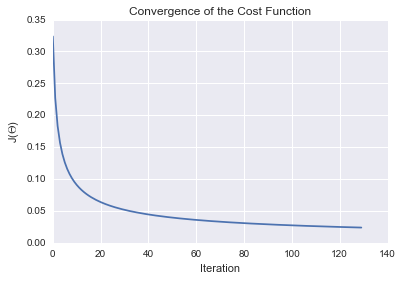

In [6]:
theta_init = np.random.normal(0,0.01,size=(5,1))

# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 10000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(X, y, theta)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    # Loop through until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)   # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs   # Get delta
            grads += delta[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        theta += grads * learning_rate
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = singlecost(X, y, theta) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

Neural networks are usually built using mulitple layers of neurons. Adding more layers into the network allows you to learn more complex functions.

In [7]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))
def feedforward(X, theta0, theta1):
    # feedforward to the first layer
    a1 = sigmoid_activation(X.T, theta0).T
    # add a column of ones for bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)
print(h)

[[ 0.49970689  0.49971051  0.49971811  0.49971061  0.49970199  0.4997015
   0.49971356  0.49972618  0.49971669  0.49972241  0.49970142  0.4997194
   0.49970478  0.49971792  0.49971656  0.49972409  0.49971417  0.49971747
   0.49970826  0.49970906  0.49971945  0.49971933  0.49971889  0.49973419
   0.49969628  0.49971859  0.49971647  0.49971943  0.49973333  0.49971135
   0.49970473  0.49972003  0.49971067  0.49969836  0.49971481  0.49971224
   0.49970963  0.49970561  0.49970312  0.49971904  0.49971448  0.49972074
   0.49970151  0.49971208  0.49971477  0.49970611  0.49971585  0.49972479
   0.49971761  0.49971264  0.49971911  0.49972834  0.49971587  0.49972725
   0.49971753  0.49971751  0.4997158   0.4997126   0.49971916  0.4997088
   0.49971102  0.49970527  0.49971562  0.49971119  0.49972917  0.4997182
   0.4997172   0.49971571  0.49971005  0.49972618  0.49972625  0.49972395
   0.49971457  0.49971821  0.49972246  0.49971533  0.49970444  0.49970391
   0.49970875  0.49969833  0.49968367  0.4

Multiple Neural Network Cost Function

In [8]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

# X and y are in memory and should be used as inputs to multiplecost()
def multiplecost(X, y, theta0, theta1):
    # feed through network
    h = feedforward(X, theta0, theta1) 
    # compute error
    inner = y * np.log(h) + (1-y) * np.log(1-h)
    # negative of average error
    return -np.mean(inner)

c = multiplecost(X, y, theta0_init, theta1_init)
print(c)

0.694957024558


Now that we have mulitple layers of parameters to learn, we must implement a method called backpropagation. We've already implemented forward propagation by feeding the data through each layer and returning an output. Backpropagation focuses on updating parameters starting at the last layer and circling back through each layer, updating accordingly.

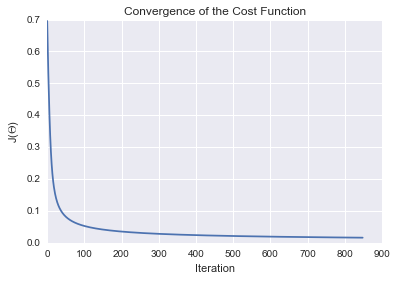

In [9]:
# Use a class for this model, it's good practice and condenses the code
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

In [10]:
X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

In [ ]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test,yhat)
print(auc)